1.Loading the Dataset

In [1]:
import pandas as pd

2.Making passengerid as index column

In [2]:
data= pd.read_csv("C:/Users/HP/Downloads/titanic_dataset.csv",index_col='PassengerId')

In [3]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


3.Basic details of Dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
data.shape

(891, 11)

In [6]:
data.size

9801

Finding missing values 

In [7]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Replacing missing values by mean

In [8]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [9]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Replacing missing values by mode(categorical value)

In [10]:
data['Cabin'].fillna(data['Cabin'].mode()[0], inplace=True)

In [11]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [12]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

5.handling outliers

Boxplot for detecting outliers

Text(0.5, 1.0, 'Boxplot of age')

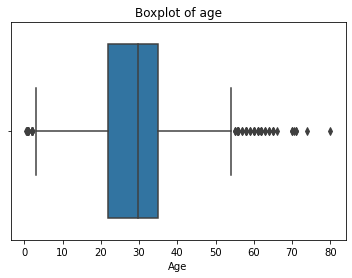

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='Age',data=data)
plt.title('Boxplot of age')

Text(0.5, 1.0, 'Boxplot of Sibsp')

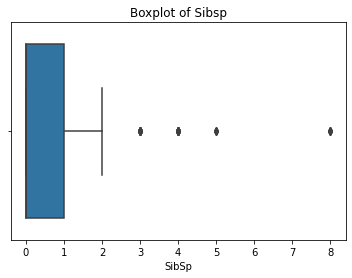

In [14]:
sns.boxplot(x='SibSp',data=data)
plt.title('Boxplot of Sibsp')

Text(0.5, 1.0, 'Fare')

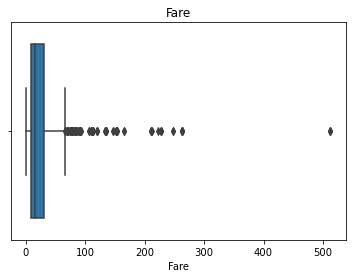

In [15]:
sns.boxplot(x='Fare',data=data)
plt.title('Fare')

Z-score method of identifying outlier

In [16]:
data1 = data['Age']
zscores=(data1-data1.mean())/data1.std()

In [17]:
zscores.mean()

4.490951817933079e-15

In [18]:
threshold=3 #defining threshold

In [19]:
outliers=data[abs(zscores)>threshold]
print("outliers:")
outliers

outliers:


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,B96 B98,Q
494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,B96 B98,C
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,B96 B98,S
746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,B96 B98,S


detecting outliers for Sipsb

In [20]:
data2=data['SibSp']
zscores=(data2-data2.mean())/data2.std()

In [21]:
zscores.mean()

1.5288929867733638e-16

In [22]:
threshold=1.5

In [23]:
outliers=data[abs(zscores)>threshold]
print("outliers:")
outliers

outliers:


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,B96 B98,S
17,0,3,"Rice, Master. Eugene",male,2.000000,4,1,382652,29.1250,B96 B98,Q
25,0,3,"Palsson, Miss. Torborg Danira",female,8.000000,3,1,349909,21.0750,B96 B98,S
28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,C23 C25 C27,S
51,0,3,"Panula, Master. Juha Niilo",male,7.000000,4,1,3101295,39.6875,B96 B98,S
60,0,3,"Goodwin, Master. William Frederick",male,11.000000,5,2,CA 2144,46.9000,B96 B98,S
64,0,3,"Skoog, Master. Harald",male,4.000000,3,2,347088,27.9000,B96 B98,S
69,1,3,"Andersson, Miss. Erna Alexandra",female,17.000000,4,2,3101281,7.9250,B96 B98,S
72,0,3,"Goodwin, Miss. Lillian Amy",female,16.000000,5,2,CA 2144,46.9000,B96 B98,S


detecting outliers for Fare

In [24]:
data3=data['Fare']
zscores=(data3-data3.mean())/data3.std()

In [25]:
zscores.mean()

7.43762203590074e-16

In [26]:
threshold=3.5

In [27]:
outliers=data[abs(zscores)>threshold]
print("outliers:")
outliers

outliers:


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,C23 C25 C27,S
89,1,1,"Fortune, Miss. Mabel Helen",female,23.000000,3,2,19950,263.0000,C23 C25 C27,S
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.000000,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.000000,0,0,PC 17755,512.3292,B96 B98,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.000000,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.000000,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.000000,3,2,19950,263.0000,C23 C25 C27,S
378,0,1,"Widener, Mr. Harry Elkins",male,27.000000,0,2,113503,211.5000,C82,C
381,1,1,"Bidois, Miss. Rosalie",female,42.000000,0,0,PC 17757,227.5250,B96 B98,C


Label encoding

In [28]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Name']=label_encoder.fit_transform(data['Name'])

In [29]:
data['Sex']=label_encoder.fit_transform(data['Sex'])

In [30]:
data['Ticket']=label_encoder.fit_transform(data['Ticket'])

In [31]:
data['Cabin']=label_encoder.fit_transform(data['Cabin'])

In [32]:
data['Embarked']=label_encoder.fit_transform(data['Embarked'])

In [33]:
data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,108,1,22.000000,1,0,523,7.2500,47,2
2,1,1,190,0,38.000000,1,0,596,71.2833,81,0
3,1,3,353,0,26.000000,0,0,669,7.9250,47,2
4,1,1,272,0,35.000000,1,0,49,53.1000,55,2
5,0,3,15,1,35.000000,0,0,472,8.0500,47,2
6,0,3,554,1,29.699118,0,0,275,8.4583,47,1
7,0,1,515,1,54.000000,0,0,85,51.8625,129,2
8,0,3,624,1,2.000000,3,1,395,21.0750,47,2
9,1,3,412,0,27.000000,0,2,344,11.1333,47,2


6. min max scaling

In [34]:
from sklearn.preprocessing import MinMaxScaler #importing the MInmaxscaler
scaler=MinMaxScaler()

In [35]:
X=data.drop('Survived', axis=1)
target=data['Survived']

In [36]:
train=scaler.fit_transform(data)

In [38]:
train #min max scaled data

array([[0.        , 1.        , 0.12134831, ..., 0.01415106, 0.32191781,
        1.        ],
       [1.        , 0.        , 0.21348315, ..., 0.13913574, 0.55479452,
        0.        ],
       [1.        , 1.        , 0.39662921, ..., 0.01546857, 0.32191781,
        1.        ],
       ...,
       [0.        , 1.        , 0.46404494, ..., 0.04577135, 0.32191781,
        1.        ],
       [1.        , 0.        , 0.09101124, ..., 0.0585561 , 0.4109589 ,
        0.        ],
       [0.        , 1.        , 0.24719101, ..., 0.01512699, 0.32191781,
        0.5       ]])